## 배수 구하기, 입력: 1개, 출력: 1개
- 배수의 규칙을 학습시키고 어떤수를 전달하여 배수를 구하게 할 것임.
- 수를 모르는 AI는 수의 배수의 규칙을 알아낸 후 수를 예측하게됨
- 인간의 학습 경로: 숫자 학습 -> 사칙연산 학습

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class
# from keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.2~
# from tensorflow.keras.models import Sequential  # class
# from tensorflow.keras.models import load_model  # model 파일 로딩
# from tensorflow.keras.layers import Dense       # 전결합층
# from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

print(tf.__version__)

2.4.1


In [2]:
print([i for i in range(1, 21)])
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수
y_train = np.array([i*2 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


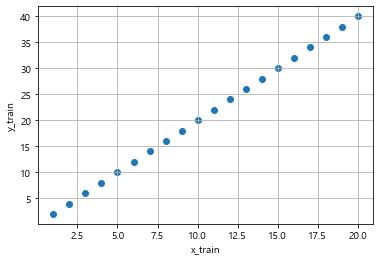

In [3]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [4]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 1: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(1, input_dim=1, activation='linear'))
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


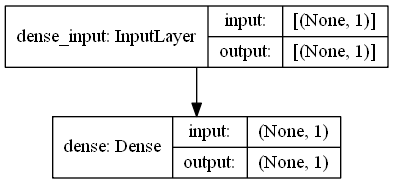

In [5]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [6]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 1s 59ms/step - loss: 724.6526 - val_loss: 2775.0583
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 1103.3726 - val_loss: 2748.1877
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 754.1773 - val_loss: 2725.8003
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 713.3415 - val_loss: 2701.9429
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 648.9638 - val_loss: 2677.4546
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 851.8945 - val_loss: 2652.7983
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 591.6175 - val_loss: 2629.0718
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 480.0485 - val_loss: 2605.7532
Epoch 9/300
16/16 [==============================] - 0s 3ms/step - loss: 671.4809 - val_loss: 2580.7124
Epoch 10/300
16/16 [==============================] - 0s 4ms/s

16/16 [==============================] - 0s 3ms/step - loss: 458.4888 - val_loss: 1273.6835
Epoch 80/300
16/16 [==============================] - 0s 3ms/step - loss: 482.5148 - val_loss: 1258.8440
Epoch 81/300
16/16 [==============================] - 0s 3ms/step - loss: 360.7918 - val_loss: 1245.4186
Epoch 82/300
16/16 [==============================] - 0s 3ms/step - loss: 366.5747 - val_loss: 1231.4934
Epoch 83/300
16/16 [==============================] - 0s 4ms/step - loss: 307.7753 - val_loss: 1218.2290
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 322.2378 - val_loss: 1204.3433
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 260.9236 - val_loss: 1191.8699
Epoch 86/300
16/16 [==============================] - 0s 3ms/step - loss: 357.8900 - val_loss: 1177.5176
Epoch 87/300
16/16 [==============================] - 0s 3ms/step - loss: 422.7807 - val_loss: 1164.2429
Epoch 88/300
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 73.0276 - val_loss: 474.2615
Epoch 158/300
16/16 [==============================] - 0s 3ms/step - loss: 64.0642 - val_loss: 467.7131
Epoch 159/300
16/16 [==============================] - 0s 3ms/step - loss: 90.0006 - val_loss: 460.4739
Epoch 160/300
16/16 [==============================] - 0s 3ms/step - loss: 84.2012 - val_loss: 453.5469
Epoch 161/300
16/16 [==============================] - 0s 4ms/step - loss: 105.0992 - val_loss: 446.9528
Epoch 162/300
16/16 [==============================] - 0s 4ms/step - loss: 87.1851 - val_loss: 440.3105
Epoch 163/300
16/16 [==============================] - 0s 3ms/step - loss: 91.3109 - val_loss: 434.1995
Epoch 164/300
16/16 [==============================] - 0s 3ms/step - loss: 104.5285 - val_loss: 427.4471
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - loss: 98.3310 - val_loss: 420.4858
Epoch 166/300
16/16 [==============================] - 0s 4ms/step - loss: 1

Epoch 236/300
16/16 [==============================] - 0s 5ms/step - loss: 15.0095 - val_loss: 121.9589
Epoch 237/300
16/16 [==============================] - 0s 4ms/step - loss: 32.6268 - val_loss: 119.1108
Epoch 238/300
16/16 [==============================] - 0s 4ms/step - loss: 25.8486 - val_loss: 116.8426
Epoch 239/300
16/16 [==============================] - 0s 4ms/step - loss: 22.6855 - val_loss: 114.6412
Epoch 240/300
16/16 [==============================] - 0s 3ms/step - loss: 25.1849 - val_loss: 112.1016
Epoch 241/300
16/16 [==============================] - 0s 3ms/step - loss: 36.7710 - val_loss: 109.6749
Epoch 242/300
16/16 [==============================] - 0s 4ms/step - loss: 33.0991 - val_loss: 107.4850
Epoch 243/300
16/16 [==============================] - 0s 4ms/step - loss: 22.1496 - val_loss: 105.5179
Epoch 244/300
16/16 [==============================] - 0s 4ms/step - loss: 32.3909 - val_loss: 103.0675
Epoch 245/300
16/16 [==============================] - 0s 4ms/st

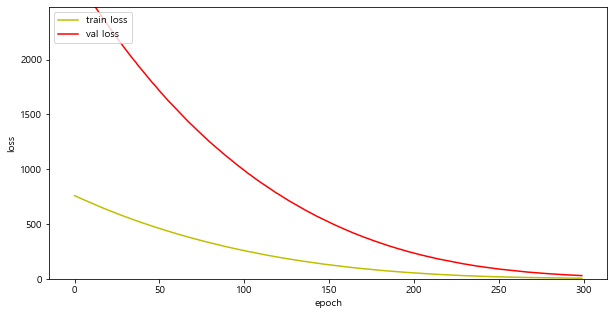

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2481.1538]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [8]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55 ])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[82.42344 ]
 [83.986984]
 [85.55054 ]
 [87.11408 ]
 [88.67763 ]]


In [9]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 82.4234390259, 정제된값: 82
x: 52, 실제값: 104, 예측값: 83.9869842529, 정제된값: 84
x: 53, 실제값: 106, 예측값: 85.5505371094, 정제된값: 86
x: 54, 실제값: 108, 예측값: 87.1140823364, 정제된값: 87
x: 55, 실제값: 110, 예측값: 88.6776275635, 정제된값: 89


### 학습이 이루어지고는 있으나 노드가 1개라서 학습 능력이 매우 떨어짐(과소 적합).

In [10]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 10: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear'))
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인


model 객체 삭제
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


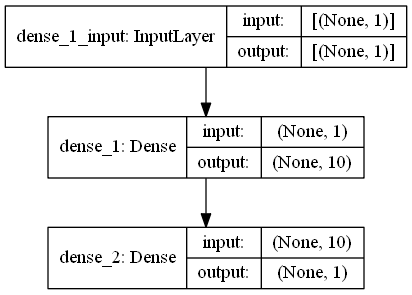

In [11]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [12]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 0s 11ms/step - loss: 256.2743 - val_loss: 880.7358
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 257.9735 - val_loss: 792.3818
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 231.8451 - val_loss: 710.1282
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 150.5406 - val_loss: 633.6757
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 210.7782 - val_loss: 552.0666
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 167.6633 - val_loss: 489.1459
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 108.6438 - val_loss: 430.5237
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 122.4047 - val_loss: 371.8854
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 103.3561 - val_loss: 321.6860
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss

16/16 [==============================] - 0s 3ms/step - loss: 0.2195 - val_loss: 0.4840
Epoch 83/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1671 - val_loss: 0.4763
Epoch 84/300
16/16 [==============================] - 0s 3ms/step - loss: 0.2388 - val_loss: 0.5111
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1288 - val_loss: 0.4728
Epoch 86/300
16/16 [==============================] - 0s 4ms/step - loss: 0.3006 - val_loss: 0.5075
Epoch 87/300
16/16 [==============================] - 0s 3ms/step - loss: 0.2116 - val_loss: 0.4826
Epoch 88/300
16/16 [==============================] - 0s 4ms/step - loss: 0.3158 - val_loss: 0.4970
Epoch 89/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2387 - val_loss: 0.4791
Epoch 90/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1825 - val_loss: 0.4521
Epoch 91/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.4457
Epoch 92/300


16/16 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.1138
Epoch 164/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1170
Epoch 165/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.1073
Epoch 166/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.0839
Epoch 167/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.1005
Epoch 168/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.0857
Epoch 169/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.0792
Epoch 170/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.0857
Epoch 171/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0869
Epoch 172/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0358 - val_loss: 0.0732
Epoc

16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 245/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 246/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 247/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 248/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 249/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 250/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 251/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 252/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 253/300
16/16 [==============================] - 0s 3ms/step - loss: 8.8358e-04 - val_loss: 0.0029


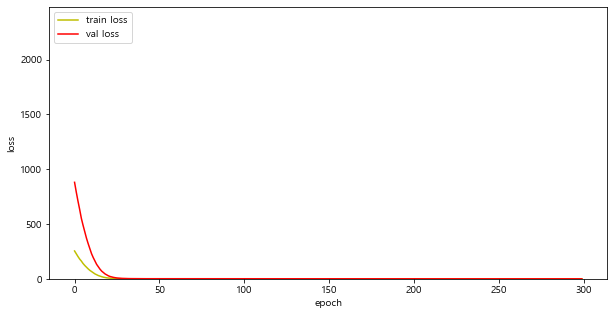

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2481.1538]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [14]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[101.954   ]
 [103.952866]
 [105.95171 ]
 [107.95057 ]
 [109.949425]]


In [15]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 101.9540023804, 정제된값: 102
x: 52, 실제값: 104, 예측값: 103.9528656006, 정제된값: 104
x: 53, 실제값: 106, 예측값: 105.9517135620, 정제된값: 106
x: 54, 실제값: 108, 예측값: 107.9505691528, 정제된값: 108
x: 55, 실제값: 110, 예측값: 109.9494247437, 정제된값: 110


### AI는 배수의 규칙을 학습 완료함.